# Exploratory Analysis Round 2

Now that we have looked at the data on an unfiltered way, we now take into account information we know about the data. For example, the channels, channel types, proteins we know.

Reference: http://www.nature.com/articles/sdata201446

Co-localization:
"Examining the cross-correlations at small 2d shifts between images reveals that pairs of antibodies which are expected to colocalize within either pre- or postsynaptic compartments (for example, Synapsin1 and vGluT1 or PSD95 and GluR2, respectively) have sharp peaks of correlation, while pairs of antibodies which represent associated pre- and postsynaptic compartments (for example, Synapsin1 and PSD95) have broader, more diffuse cross-correlation peaks"



In [6]:
# Import Necessary Libraries
import numpy as np
import os, csv, json

from matplotlib import *
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import KernelDensity

# pretty charting
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')

%matplotlib inline

In [2]:
# channel = ['Synap','Synap','VGlut1','VGlut1','VGlut2','Vglut3',
#            'psd','glur2','nmdar1','nr2b','gad','VGAT', 'PV','Gephyr',
#            'GABAR1','GABABR','CR1','5HT1A', 'NOS','TH','VACht',
#            'Synapo','tubuli','DAPI']

channel = ['Synap_01','Synap_02','VGlut1_01','VGlut1_02','VGlut2','Vglut3',
           'psd','glur2','nmdar1','nr2b','gad','VGAT', 'PV','Gephyr',
           'GABAR1','GABABR','CR1','5HT1A', 'NOS','TH','VACht',
           'Synapo','tubuli','DAPI']

channeltype = ['ex.pre','ex.pre','ex.pre','ex.pre','ex.pre','in.pre.small', 
               'ex.post','ex.post','ex.post','ex.post','in.pre','in.pre', 
               'in.pre','in.post','in.post','in.post','in.pre.small','other',
               'ex.post','other','other','ex.post','none','none']
print channel
print channeltype

['Synap_01', 'Synap_02', 'VGlut1_01', 'VGlut1_02', 'VGlut2', 'Vglut3', 'psd', 'glur2', 'nmdar1', 'nr2b', 'gad', 'VGAT', 'PV', 'Gephyr', 'GABAR1', 'GABABR', 'CR1', '5HT1A', 'NOS', 'TH', 'VACht', 'Synapo', 'tubuli', 'DAPI']
['ex.pre', 'ex.pre', 'ex.pre', 'ex.pre', 'ex.pre', 'in.pre.small', 'ex.post', 'ex.post', 'ex.post', 'ex.post', 'in.pre', 'in.pre', 'in.pre', 'in.post', 'in.post', 'in.post', 'in.pre.small', 'other', 'ex.post', 'other', 'other', 'ex.post', 'none', 'none']


In [3]:
# load in volume data
list_of_locations = []
with open('data/synapsinR_7thA.tif.Pivots.txt') as file:
    for line in file:
        inner_list = [float(elt.strip()) for elt in line.split(',')]
        
        # create list of features
        list_of_locations.append(inner_list)

# conver to a numpy matrix
list_of_locations = np.array(list_of_locations)

In [3]:
#### RUN AT BEGINNING AND TRY NOT TO RUN AGAIN - TAKES WAY TOO LONG ####
# write new list_of_features to new txt file
csvfile = "data_normalized/shortenedFeatures_normalized.txt"

# load in the feature data
list_of_features = []
with open(csvfile) as file:
    for line in file:
        inner_list = [float(elt.strip()) for elt in line.split(',')]
        
        # create list of features
        list_of_features.append(inner_list)

# conver to a numpy matrix
list_of_features = np.array(list_of_features)

In [5]:
# for i in range(0, len(list_of_locations)):
print min(list_of_locations[:,0]), " ", max(list_of_locations[:,0])
print min(list_of_locations[:,1]), " ", max(list_of_locations[:,1])
print min(list_of_locations[:,2]), " ", max(list_of_locations[:,2])

print abs(min(list_of_locations[:,0]) - max(list_of_locations[:,0]))
print abs(min(list_of_locations[:,1]) - max(list_of_locations[:,1]))
print abs(min(list_of_locations[:,2]) - max(list_of_locations[:,2]))

28.0   1513.0
23.0   12980.0
2.0   40.0
1485.0
12957.0
38.0


In [4]:
# Make a feature dictionary for all the different protein expressions
features = {}
for idx, chan in enumerate(channel):
    indices = [0+idx, 24+idx, 48+idx, 72+idx]
    features[chan] = list_of_features[:,indices]
    
print "The number of protein expressions are:"
print "This number should be 24: ", len(features.keys())

The number of protein expressions are:
This number should be 24:  24


In [ ]:
# 
print "The number of unique channel types are: ", len(np.unique(channeltype))
print np.unique(channeltype)

The number of unique channel types are:  7
['ex.post' 'ex.pre' 'in.post' 'in.pre' 'in.pre.small' 'none' 'other']


# Correlation Matrix of All Protein Expressions For Each Measurement


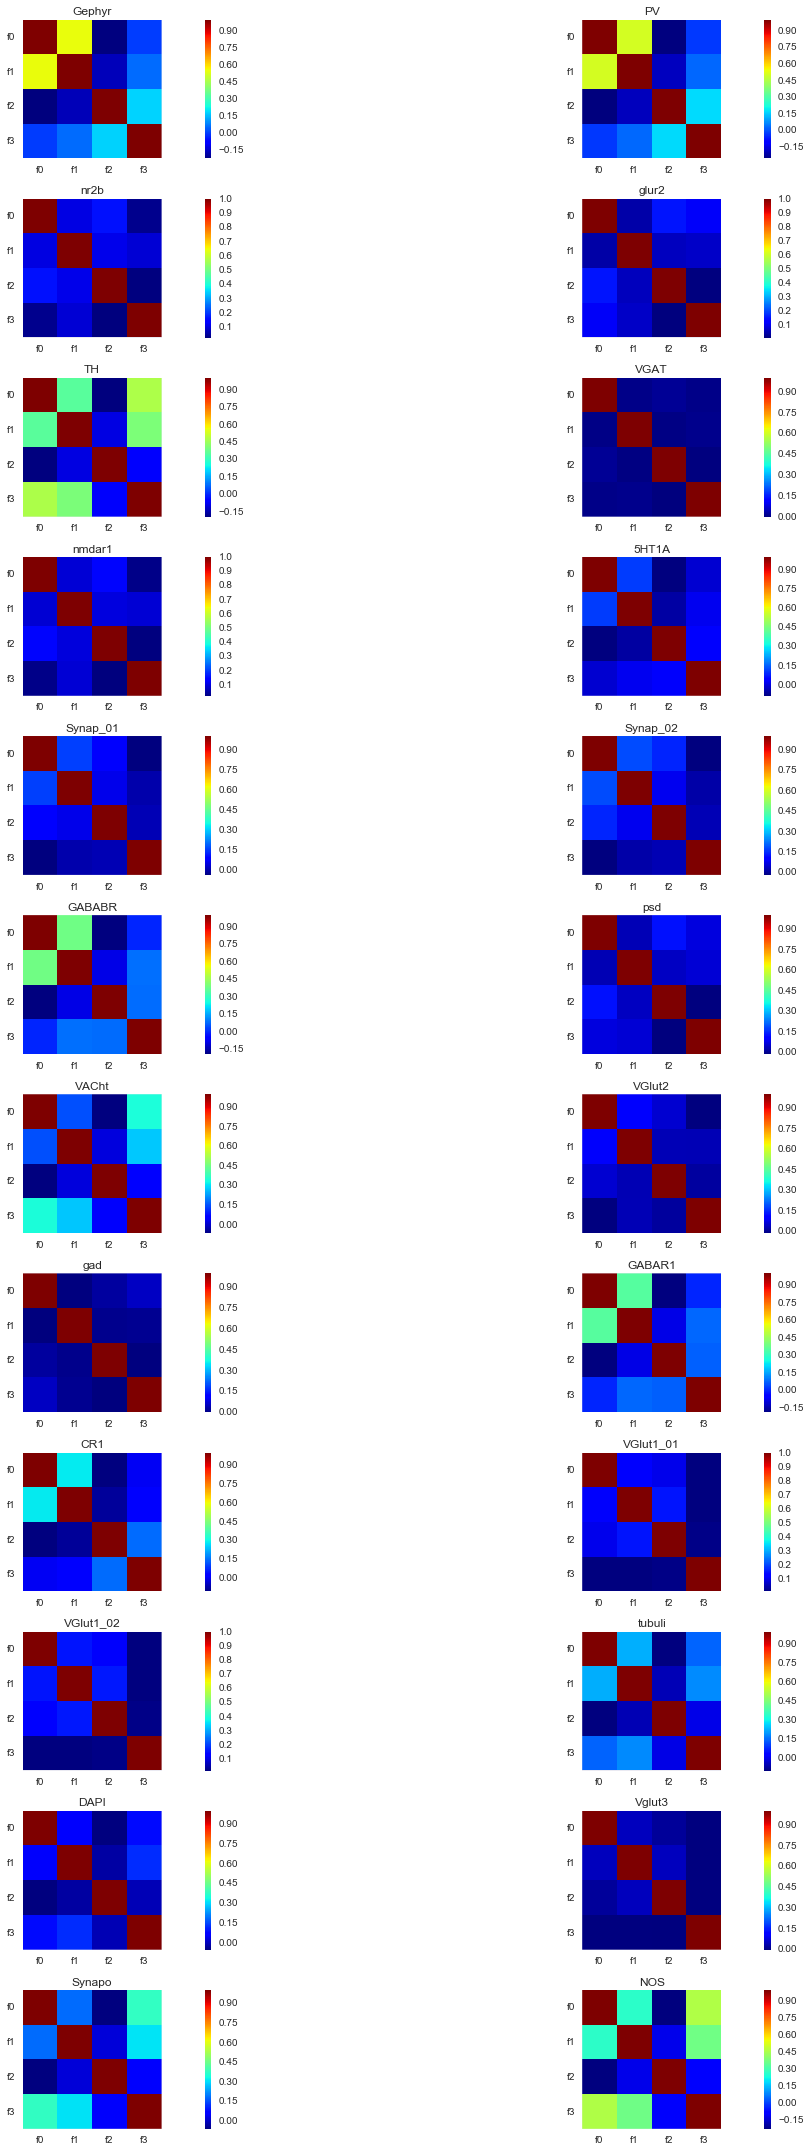

In [19]:
fig = plt.figure(figsize=(20,30))

index = 1
for key in features.keys():
    # Compute feature correlation matrix
    R = np.corrcoef(features[key],rowvar=0)
    # R_normalize = np.corrcoef(normalize_features, rowvar=0)
#     fig = plt.figure(figsize=(10,10))
    plt.subplot(len(features.keys())/2, 2, index)
    plt.imshow(R, cmap=plt.get_cmap('jet'), interpolation='none')
    plt.title("Correlation plot of all features f0, f1, f2, f3")
    plt.colorbar()

    plt.xticks(np.arange(0,4, 1), ['f0', 'f1', 'f2', 'f3'])
    plt.yticks(np.arange(0,4, 1), ['f0', 'f1', 'f2', 'f3'])
    plt.title(key)
    ax = plt.gca()
    ax.grid(False)
    xmin = ax.get_xlim

    index += 1
plt.tight_layout()

## Log-Transform Data


In [4]:
f0_list_of_features = list_of_features[:,0:24]
new_list_of_features = np.log(f0_list_of_features)
print new_list_of_features.shape

(1119299, 24)
(1119299, 24)


In [5]:
new_list_of_features = np.array(new_list_of_features)
# write new list_of_features to new txt file
csvfile = "data/f0_logtransformed.txt"

#Assuming res is a flat list
with open(csvfile, "w") as output:
    # write to new file the data
    writer = csv.writer(output, lineterminator='\n')
    for row in range(0, len(new_list_of_features)):
        writer.writerow(new_list_of_features[row,:])

## Kernel Density Estimation

? How to run kernel density estimation ?

/Users/adam2392/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/adam2392/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/adam2392/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a singl

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

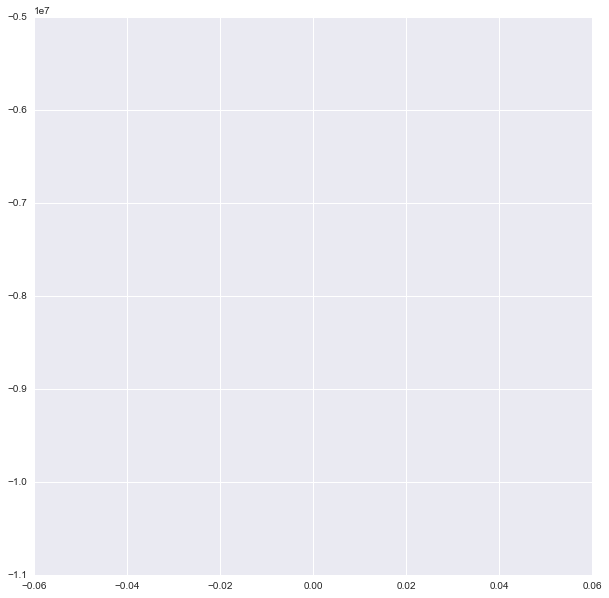

In [29]:
fig = plt.figure(figsize=(10,10))
for i in range(0, new_list_of_features.shape[1]):
    kde = KernelDensity().fit(new_list_of_features[:,i])
    log_dens = kde.score_samples(np.linspace(-5, 5, new_list_of_features.shape[0]))
    plt.plot(log_dens, label="kernel = gaussian")

(100, 1)
(1000, 1)


/Users/adam2392/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/adam2392/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


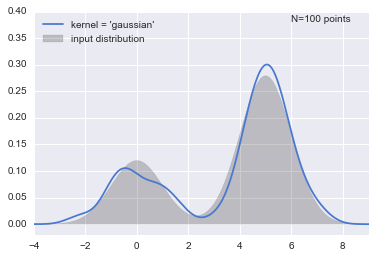

In [27]:
from scipy.stats import norm
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, 0.3 * N),
                    np.random.normal(5, 1, 0.7 * N)))[:, np.newaxis]

print X.shape

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

print X_plot.shape
true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')

for kernel in ['gaussian']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()